In [1]:
import sys
!{sys.executable} -m pip install --upgrade scikit-learn==1.6.1

In [1]:
import sklearn
print(sklearn.__version__)

1.6.1


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [3]:
# Load dataset
data = pd.read_csv("D:\Vs code\Major Project\sicklecell_modified_dataset.csv")  # Update with your dataset path


In [4]:
data.head()

,Age_Months,Father_SCT,Mother_SCT,Family_History_SCD,Fatigue,Jaundice,Swelling_Hands_Feet,Frequent_Infections,Pain_Crises_Ever,Hemoglobin_g_dL,Hb_Electrophoresis_HbS_Percentage,Sickle_Cell_Status
0,132,1,0,1,1,0,1,1,0,9.355153,5.370935,0
1,96,0,1,0,1,1,0,0,1,9.785174,32.879167,0
2,174,0,1,1,1,1,0,1,0,9.060273,17.668654,0
3,28,0,1,0,1,1,0,0,1,8.100648,28.024395,0
4,33,0,1,0,1,0,0,1,0,10.629733,87.330474,0


In [5]:
data.isnull().sum()

Age_Months                           0
Father_SCT                           0
Mother_SCT                           0
Family_History_SCD                   0
Fatigue                              0
Jaundice                             0
Swelling_Hands_Feet                  0
Frequent_Infections                  0
Pain_Crises_Ever                     0
Hemoglobin_g_dL                      0
Hb_Electrophoresis_HbS_Percentage    0
Sickle_Cell_Status                   0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age_Months                         10000 non-null  int64  
 1   Father_SCT                         10000 non-null  int64  
 2   Mother_SCT                         10000 non-null  int64  
 3   Family_History_SCD                 10000 non-null  int64  
 4   Fatigue                            10000 non-null  int64  
 5   Jaundice                           10000 non-null  int64  
 6   Swelling_Hands_Feet                10000 non-null  int64  
 7   Frequent_Infections                10000 non-null  int64  
 8   Pain_Crises_Ever                   10000 non-null  int64  
 9   Hemoglobin_g_dL                    10000 non-null  float64
 10  Hb_Electrophoresis_HbS_Percentage  10000 non-null  float64
 11  Sickle_Cell_Status                 10000 non-null  int6

In [7]:
# Separate features and target
X = data.drop(['Sickle_Cell_Status'], axis=1)
y = data['Sickle_Cell_Status']
X

,Age_Months,Father_SCT,Mother_SCT,Family_History_SCD,Fatigue,Jaundice,Swelling_Hands_Feet,Frequent_Infections,Pain_Crises_Ever,Hemoglobin_g_dL,Hb_Electrophoresis_HbS_Percentage
0,132,1,0,1,1,0,1,1,0,9.355153,5.370935
1,96,0,1,0,1,1,0,0,1,9.785174,32.879167
2,174,0,1,1,1,1,0,1,0,9.060273,17.668654
3,28,0,1,0,1,1,0,0,1,8.100648,28.024395
4,33,0,1,0,1,0,0,1,0,10.629733,87.330474
...,...,...,...,...,...,...,...,...,...,...,...
9995,70,1,1,1,0,0,0,0,1,11.470367,42.459704
9996,56,1,0,1,0,1,1,0,1,9.783483,26.228237
9997,106,0,0,1,1,1,0,1,1,10.420234,31.148218
9998,90,0,1,1,1,1,0,0,0,10.481169,54.175546


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# Train models
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Step 8: Predictions and Accuracy
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 97.20%


In [12]:
# Step 9: Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2513
           1       0.92      0.90      0.91       487

    accuracy                           0.97      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.97      0.97      0.97      3000



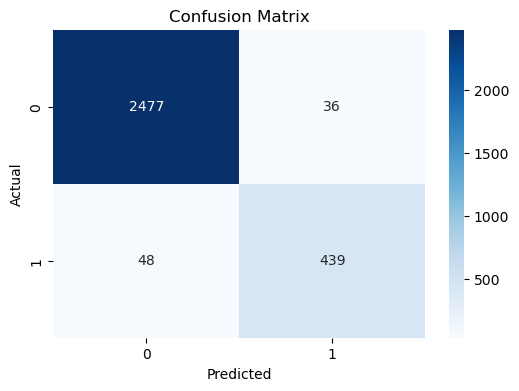

In [13]:
# Step 10: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
import joblib

# Save the Random Forest model to a file
joblib.dump(rf, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")

Random Forest model saved as 'random_forest_model.pkl'
